<a href="https://colab.research.google.com/github/prcstak/service_text_recognition/blob/main/notebooks/remove_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

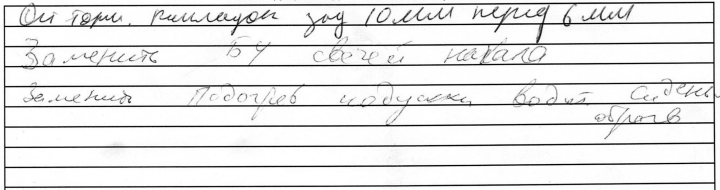

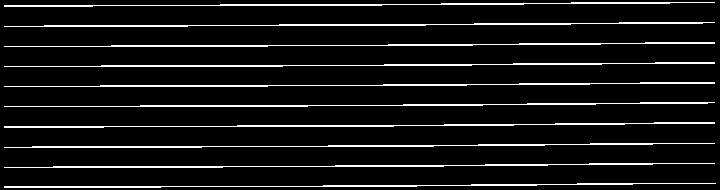

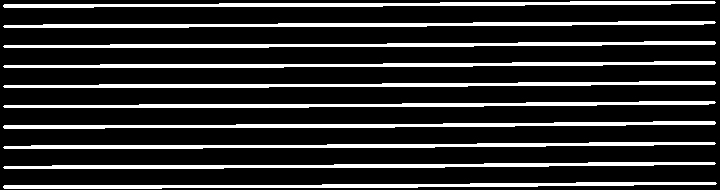

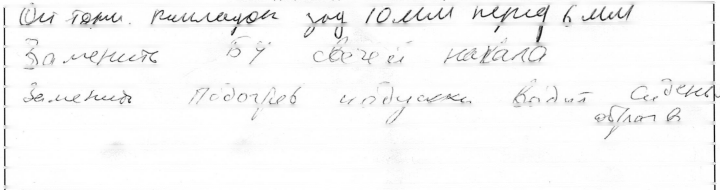

In [75]:
image = cv2.imread('/content/Screenshot from 2024-04-05 14-42-58.png', 0)
cv2_imshow(image)
thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove border
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cv2_imshow(detected_lines)
# horizontal = cv2.dilate(detected_lines, (3,3))
# cv2_imshow(horizontal)

cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
mask = np.zeros(image.shape, np.uint8)

for c in cnts:
    cv2.drawContours(mask, [c], -1, (255,255,255), 2)
cv2_imshow(mask)

image = cv2.inpaint(image,mask,13,cv2.INPAINT_TELEA)
cv2_imshow(image)


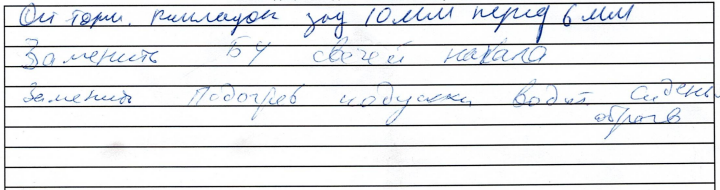

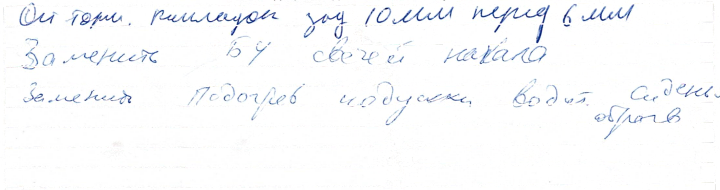

In [70]:
image = cv2.imread('/content/Screenshot from 2024-04-05 14-42-58.png')
cv2_imshow(image)
# Remove border
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))
temp2 = 255 - cv2.morphologyEx(image, cv2.MORPH_CLOSE, horizontal_kernel)
result = cv2.add(temp2, image)

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
temp2 = 255 - cv2.morphologyEx(image, cv2.MORPH_CLOSE, vertical_kernel)
result = cv2.add(temp2, result)

cv2_imshow(result)

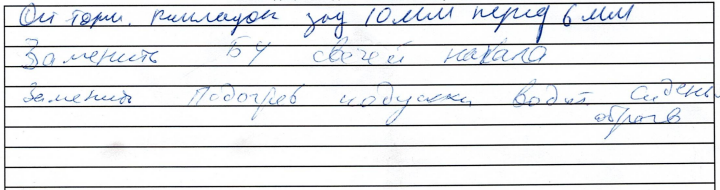

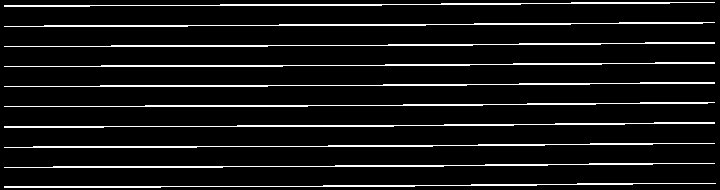

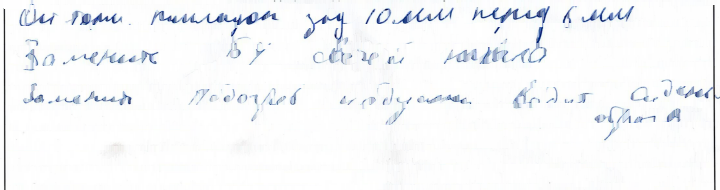

In [ ]:
image = cv2.imread('/content/Screenshot from 2024-04-05 14-42-58.png')
cv2_imshow(image)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

cv2_imshow(detected_lines)
cv2_imshow(result)

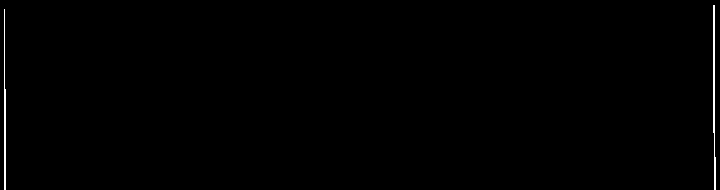

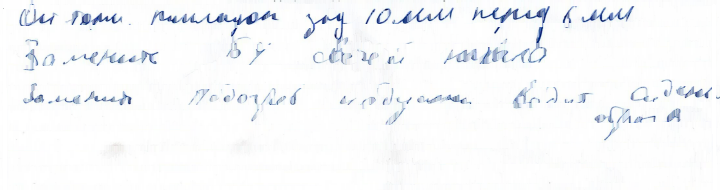

In [ ]:
gray = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove vertical
verticall_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, verticall_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 2)

cv2_imshow(detected_lines)
cv2_imshow(result)